# Part I: Multi-layer Perceptron with sklearn

- Author: Archit YADAV

## 1 Learning Boolean Operators

### 1. Classifier for AND operator

In [25]:
#import classifier as classifier
import numpy as np
from sklearn.neural_network import MLPClassifier 
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 0, 0, 1] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

### 2. Classifier for OR operator

In [6]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 1] # Outputs

X_test = [[1., 0.]]

classifier = MLPClassifier(hidden_layer_sizes=(), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

### 2. Classifier for XOR operator

#### (a)

In [10]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 0] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

#### (b)

In [14]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 0] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(4, 4), activation="identity", solver='lbfgs')
classifier.fit(X, y)

classifier.predict(X_test)

array([1])

#### (c)

In [28]:
X = [ [0., 0.], [0., 1.], [1., 0.], [1., 1.] ] # Inputs
y = [0, 1, 1, 0] # Outputs

X_test = [[1., 1.]]

classifier = MLPClassifier(hidden_layer_sizes=(4, 4),
                           activation="tanh", solver='lbfgs', max_iter=1000)
classifier.fit(X, y)

classifier.predict(X_test)


array([0])

## 2 Image Classification

In [320]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

dataset = load_digits()
X = dataset.data # inputs
y = dataset.target # Associated outputs

train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state=3)
print(train_X.shape)

(1617, 64)


In [344]:
classifier = MLPClassifier(hidden_layer_sizes=(),
                           activation="identity",
                           solver='sgd', tol=1e-10, max_iter=1000000)
classifier.fit(train_X, train_y)
classifier.predict(test_X)

from sklearn.metrics import accuracy_score

test_y_pred = classifier.predict(test_X) # Predicted results
print(" Accuracy: ", accuracy_score(test_y, test_y_pred ))

 Accuracy:  0.9666666666666667


| Experiment No. | Hidden Layers | Activation | Solver | Iterations |   Accuracy   |
|:--------------:|:-------------:|:----------:|:------:|:----------:|:------------:|
|        1       |       0       |  identity  |  lbfgs |    1000    |  [0.93, 1.0] |
|        2       |       0       |    tanh    |  lbfgs |    1000    | [0.94, 0.97] |
|        3       |       0       |  logistic  |  lbfgs |    1000    |     0.94     |
|        4       |       0       |    reLU    |  lbfgs |    1000    | [0.93, 0.97] |


---

# Part II: PyTorch and CNN

## 1. PyTorch Tensor Basics

In [4]:
import torch
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(x_data)

tensor([[1, 2],
        [3, 4]])


In [12]:
# 4X4 tensor matrix
tensor = torch.ones(4, 4)
tensor = tensor + 2

# Add 1 to each element
tensor2 = tensor + 1

print(tensor)
print(tensor2)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])


In [13]:
# tensor multiplication
tensor * tensor2

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [12., 12., 12., 12.]])

## 2. Torch Autograd

Say, we want to compute the derivative of the following equation:

$Q = 3a^3 - b^2$

We know that

$\frac{\partial Q}{\partial a} = 9a^2$

and

$\frac{\partial Q}{\partial b} = -2b$

In [27]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

print(a)
print(b)

Q = 3*a**3 - b**2

tensor([2., 3.], requires_grad=True)
tensor([6., 4.], requires_grad=True)


In [31]:
# Gradient of Q wrt itself = 1
external_grad = torch.tensor([1., 1.])

Q.backward(gradient=external_grad, retain_graph=True)

print("Gradient of Q wrt a:", a.grad)
print("Gradient of Q wrt a:", b.grad)

Gradient of Q wrt a: tensor([144., 324.])
Gradient of Q wrt a: tensor([-48., -32.])


In [ ]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [ ]:
prediction = model(data) # forward pass

loss = (prediction - labels).sum()
loss.backward() # backward pass

In [ ]:
# Load SGD optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# Initiate gradient descent
optim.step() #gradient descent


## 3. LeNet Network for MNIST

The goal is to play around with LeNet architecture and test it on
MNIST dataset for image based digit classification.
Comparison by tweaking various parameters and with
MLP model will also be done.

References:

* [PyTorch docs](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
* [TDS article](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627)
  (majority source code taken from)

In [8]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim


In [9]:
# Transformations on data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,),
                                                   (0.5,)),
                              ])
# Normalize: to normalize the tensor with mean and std. dev.

### Download the dataset

In [14]:
# Download the datasets
trainset = datasets.MNIST('./data', download=True, train=True, transform=transform)
valset = datasets.MNIST('./data', download=True, train=False, transform=transform)

# Feed the datasets to DataLoader
# Read 64 images at a time
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw
Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw
Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw
Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


180.4%

In [15]:
# Just load 1 batch of image to check it
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 64 images per batch
# 28x28 image dimension
print(images.shape)

# 64 labels
print(labels.shape)


torch.Size([64, 1, 28, 28])
torch.Size([64])


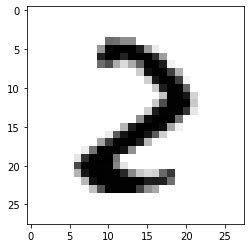

In [17]:
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

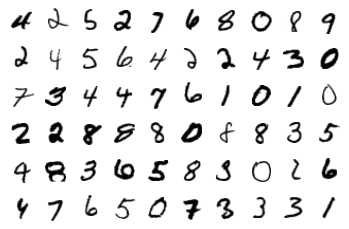

In [18]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [19]:

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [20]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [21]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027],
        [ 0.0023,  0.0023,  0.0023,  ...,  0.0023,  0.0023,  0.0023],
        ...,
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011]])


In [22]:
from time import time

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6407392622311232
Epoch 1 - Training loss: 0.28553842009702474
Epoch 2 - Training loss: 0.2236500350134904
Epoch 3 - Training loss: 0.1802534518648249
Epoch 4 - Training loss: 0.15037322696496938
Epoch 5 - Training loss: 0.13070308376870143
Epoch 6 - Training loss: 0.11233462590668629
Epoch 7 - Training loss: 0.1003932966532976
Epoch 8 - Training loss: 0.0899897663633643
Epoch 9 - Training loss: 0.08074607021078023
Epoch 10 - Training loss: 0.07296935273215238
Epoch 11 - Training loss: 0.06729265397984478
Epoch 12 - Training loss: 0.06201122409558849
Epoch 13 - Training loss: 0.057144609954593376
Epoch 14 - Training loss: 0.05301789080288245

Training Time (in minutes) = 4.456554011503855


In [23]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 4


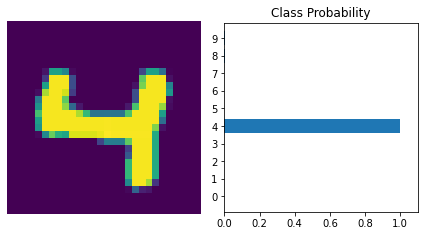

In [26]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [27]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9746


TODO:
* Make a table of different experiments
* Add proper comments


